# __Predicting E-Commerce Product Recommendations__

__Background:__
This is a NLP problem dealing with data from an e-commerce store focusing on women's clothing. Each record in the dataset is a customer review which consists of the review title, text description and a rating (ranging from 1 - 5) for a product amongst other features. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

<br/>

__Main Objective:__ 

Leverage the review text attributes amongst other structured features to build a supervised predictive model to predict if the product is recommended by the customer or not (1 or 0) based on the given attributes (and derived features)

<br/>

__Objectives for the project:__

- Phase 1: Data Retrieval and Understanding
- Phase 2: Basic Exploratory Data Analysis
- Phase 3: Feature Engineering and Modeling
- Phase 4: Evaluation, Insights, Recommendations and Report


### Phase 1: Data Retrieval and Understanding

In [1]:
#Load up basic dependencies
import numpy as np
import pandas as pd

In [2]:
#Load the dataset
df = pd.read_csv('https://github.com/dipanjanS/text-analytics-with-python/raw/master/media/Womens%20Clothing%20E-Commerce%20Reviews%20-%20NLP.csv', keep_default_na=False)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
#check dataset details
df.shape

(23486, 10)

This dataset includes 23486 rows and 10 columns (features).

Each row corresponds to a customer review, and includes the features:


*   Clothing ID: Integer Categorical variable that refers to the specific    piece being reviewed.
*   Age: Positive Integer variable of the reviewers age.
*   Title: String variable for the title of the review.
*   Review Text: String variable for the review body.
*   Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
*   Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
*   Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
*   Division Name: Categorical name of the product high level division.
*   Department Name: Categorical name of the product department name.
*   Class Name: Categorical name of the product class name.















In [4]:
#information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    23486 non-null  object
 3   Review Text              23486 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23486 non-null  object
 8   Department Name          23486 non-null  object
 9   Class Name               23486 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [5]:
#1. Basic Data Processing

#Create "Review" column which conbine the "Title" and "Review Text" texts.
df['Review'] = (df['Title'].map(str) +' '+ df['Review Text']).apply(lambda row: row.strip())
#Remove 'Title' and 'Review Text' columns
df_new = df.drop(columns = ['Title', 'Review Text'])
#View dataframe
df_new.head()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review
0,767,33,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,1080,34,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,1077,60,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,1049,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,847,47,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


In [6]:
#check any blank reviews(total row of black reviews)
sum(df_new['Review']=='')

844

In [7]:
#2. Remove all the blank Review
df_new['Review'].replace('', np.nan, inplace = True)
df_new.dropna(subset=['Review'], inplace = True)

In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22642 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              22642 non-null  int64 
 1   Age                      22642 non-null  int64 
 2   Rating                   22642 non-null  int64 
 3   Recommended IND          22642 non-null  int64 
 4   Positive Feedback Count  22642 non-null  int64 
 5   Division Name            22642 non-null  object
 6   Department Name          22642 non-null  object
 7   Class Name               22642 non-null  object
 8   Review                   22642 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.7+ MB


# ___Phase 2: Exploratory Data Analysis___






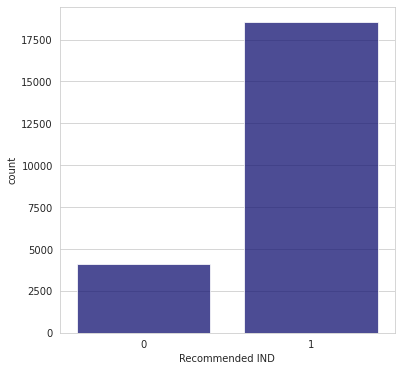

In [9]:
#lookat the number of products recommended and not recommended by customers
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.figure(figsize = (6,6))
sns.countplot( data= df_new, x= 'Recommended IND', color ='navy', alpha = 0.75);


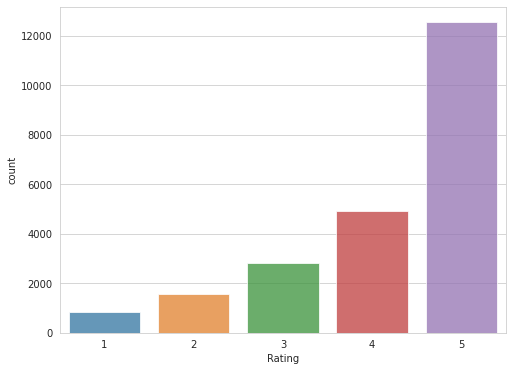

In [10]:
#Show distribution on ratings
plt.figure(figsize = (8,6))
sns.countplot( data= df_new, x= 'Rating',  alpha = 0.75);

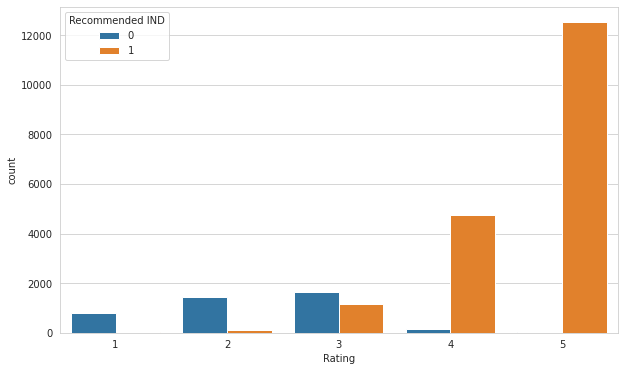

In [11]:
#Ratings vs. Recommendations
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', hue='Recommended IND', data=df_new);

This makes it clear that low ratings (1-2) lead to customers not recommending products and high ratings (4-5) lead to customers recommending products.
It shows the exmple of data\target leakage in machine learning where we want to predict a vriable using other features, but there are features like 'Rating' which indirectly relate strongly to 'Recommendation'

So it is better to drop the column to build an unbiased predictive model. 

We have to drop the 'Rating' features which indirectly relate very strongly to 'Recommendation', to predict a variable(Recommended) using other features with being an unbiased predictive model. 

In [12]:
#Drop the rating column
df_no_rating = df_new.drop(columns='Rating')
df_no_rating.head(4)

,Clothing ID,Age,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review
0,767,33,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,1080,34,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,1077,60,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,1049,50,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."


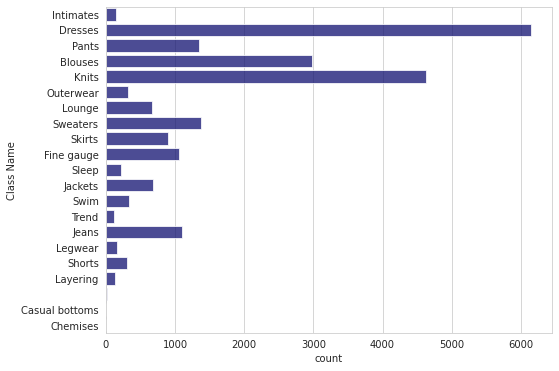

In [13]:
#View the distribution on product class name
plt.figure(figsize = (8,6))
sns.countplot(y = 'Class Name', data= df_no_rating, color='navy', alpha = 0.75);

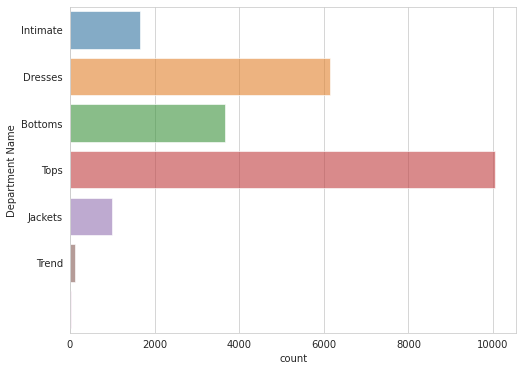

In [14]:
#View the distribituion based on Department Name
plt.figure(figsize=(8,6))
sns.countplot(y = 'Department Name', data=df_no_rating, alpha =0.6);

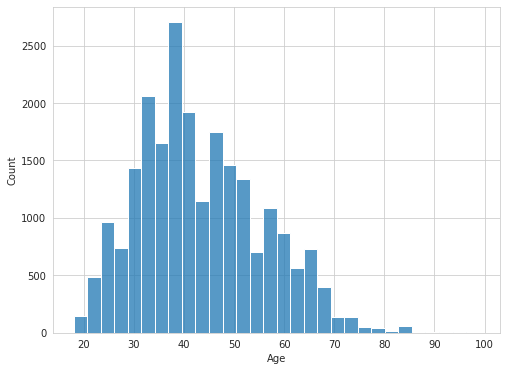

In [15]:
#Viewing histogram distributions for Age on Reviews
plt.figure(figsize= (8,6))
sns.histplot(x = 'Age', bins = 30, data =df_no_rating);

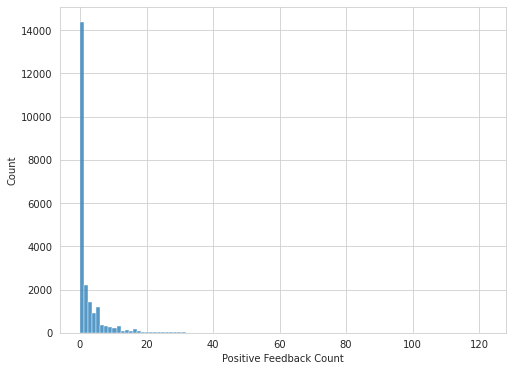

In [16]:
#Viewing histogram distributions for 'Positive Feedback Count' on Reviews
plt.figure(figsize= (8,6))
sns.histplot(x = 'Positive Feedback Count', bins = 100, data =df_no_rating);

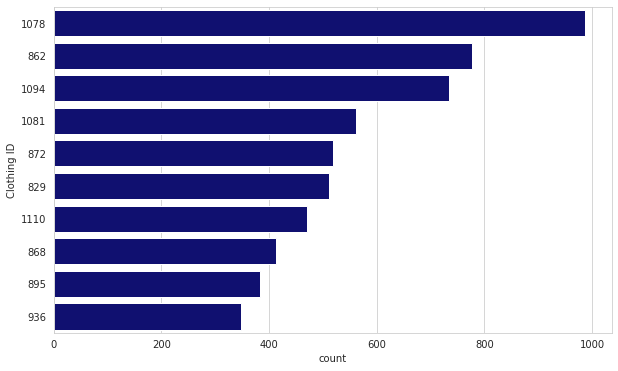

In [17]:
# top 10 product IDs reviewed by customers
plt.figure(figsize=(10, 6))
sns.countplot(y='Clothing ID', data=df_new, color='navy', 
              order=df_no_rating['Clothing ID'].value_counts().iloc[:10].index);

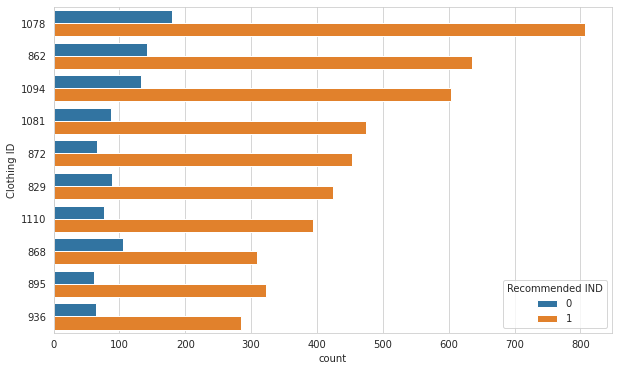

In [19]:
##Top 10 product's recommendation
plt.figure(figsize=(10, 6))
sns.countplot(y='Clothing ID', hue='Recommended IND', data=df_no_rating, 
              order = df_no_rating['Clothing ID'].value_counts().iloc[:10].index);

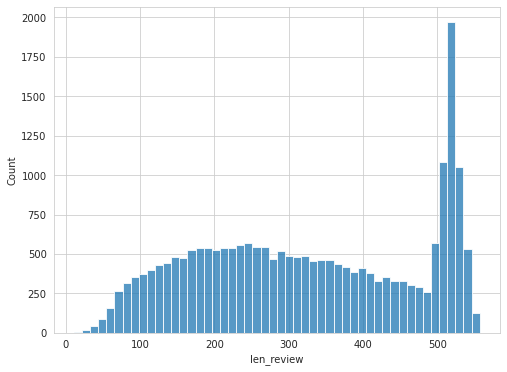

In [20]:
#compute the length of each review and visualize it
feature_col = 'Review'
df_no_rating['len_review']= df_no_rating[feature_col].apply(len)
plt.figure(figsize = (8,6))
sns.histplot(x= 'len_review', data = df_no_rating, bins = 50)

In [22]:
import nltk


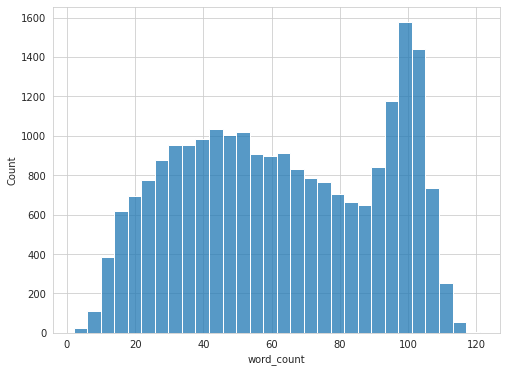

In [23]:
#Words per review + visualize
DF = df_no_rating
default_st = nltk.sent_tokenize
DF['word_count']= DF[feature_col].apply(lambda x: len([word for word in x.split()]))
plt.figure(figsize= (8,6))
sns.histplot( x= 'word_count', bins = 30, data = DF)

#___Phase 3: Feature Engineering and Modeling___



In [24]:
#view the dataset
DF.head()

,Clothing ID,Age,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review,len_review,word_count
0,767,33,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...,53,8
1,1080,34,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...,303,62
2,1077,60,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...,524,102
3,1049,50,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps...",141,25
4,847,47,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...,209,38


## Drop unnecessary features

In [25]:
#subset out unnecessary features
DF = DF[['Review', 'Age', 'Positive Feedback Count', 'Recommended IND']]
DF['Recommended IND'].value_counts() # this shows there is some inbalanced in the database on product recommendations

1    18541
0     4101
Name: Recommended IND, dtype: int64

#Build train and test dataset


In [26]:
#Build train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(DF.drop(columns= ['Recommended IND']), DF['Recommended IND'], test_size= 0.3, random_state= 42)
x_train.shape, x_test.shape

((15849, 3), (6793, 3))

In [27]:
from collections import Counter
Counter(y_train), Counter(y_test)

(Counter({0: 2883, 1: 12966}), Counter({0: 1218, 1: 5575}))

In [28]:
x_train.head(3)

,Review,Age,Positive Feedback Count
4654,Sexy and flows I love this jumpsuit! i'm usual...,79,8
5333,Wanted to love it The dresss is much shorter t...,32,3
22502,So cute! though inside not soft I got the crea...,34,0


In [29]:
y_train[:3]

4654     1
5333     0
22502    1
Name: Recommended IND, dtype: int64

## Building predictive models for product recommendation__

- __Experiment 1:__ Basic NLP Count based features, Structured Features (Age and Feedback Count) + Logistic Regression

- __Experiment 2:__ Features from Sentiment Analysis + Logistic Regression

- __Experiment 3:__ BOW features (1-gram) + Logistic Regression

- __Experiment 4:__ BOW features (2-gram) + Logistic Regression

- __Experiment 5:__ BOW features (3-gram) + Logistic Regression

- __Experiment 6:__ BOW features (3-gram) + Feature Selection + Logistic Regression

- __Experiment 7:__ BOW features (3-gram) + Feature Selection + Structuref Features (Age and Feedback Count) + Logistic Regression

- __Experiment 8:__ Same as Experiment 7 but use TF-IDF *features*
- __Experiment 9:__ Same as Experiment 8 + Random Forest
- __Experiment 10:__ Same as Experiment 9 + GradientBoosting
- __Experiment 11:__ Same as Experiment 9 + XGBoosting

#Experiment1: Basic NLP Count based Features & Age, Feedback Count


---


*   Word Count: total number of words in the documents
*   Character Count: total number of characters in the documents
*   Average Word Density: average length of the words used in the documents
*   Puncutation Count: total number of punctuation marks in the documents
*   Upper Case Count: total number of upper count words in the documents
*   Title Word Count: total number of proper case (title) words in the documents





In [30]:
import string
feature_col = 'Review'
x_train['char_count'] = x_train[feature_col].apply(len)
x_train['word_count'] = x_train[feature_col].apply(lambda x: len(x.split()))
x_train['word_density'] = x_train['char_count']/x_train['word_count']
x_train['punctuation_count'] = x_train[feature_col].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation)))
x_train['title_word_count'] = x_train[feature_col].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
x_train['upper_case_word_count'] = x_train[feature_col].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

x_test['char_count'] = x_test[feature_col].apply(len)
x_test['word_count'] = x_test[feature_col].apply(lambda x: len(x.split()))
x_test['word_density'] = x_test['char_count']/x_test['word_count']
x_test['punctuation_count'] = x_test[feature_col].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation)))
x_test['title_word_count'] = x_test[feature_col].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
x_test['upper_case_word_count'] = x_test[feature_col].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))


In [31]:
x_train.head()

,Review,Age,Positive Feedback Count,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count
4654,Sexy and flows I love this jumpsuit! i'm usual...,79,8,469,95,4.936842,17,2,1
5333,Wanted to love it The dresss is much shorter t...,32,3,144,26,5.538462,4,2,0
22502,So cute! though inside not soft I got the crea...,34,0,451,93,4.849462,14,2,1
392,Lovely fabric but tiny hips If your hips are b...,34,0,396,83,4.771084,6,2,0
372,"So cool This has great drape, length, the patt...",57,1,292,56,5.214286,10,2,0


Initializing a Logistic Regression Model

In [32]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1, random_state= 42, solver='lbfgs', max_iter = 1e4)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

#fit model
lr.fit(x_train.drop(columns=['Review'], axis=1), y_train)
#predict on the test dataframe

lr_predict = lr.predict(x_test.drop(columns=['Review'], axis=1))

Model Evaluation Metrics 


*   Precision: The positive predictive power of a model. Out of all the predictions made by a model for a class, how many are actually correct
*   Recall: The coverage or hit-rate of a model. Out of all the test data samples belonging to a class, how many was the model able to predict (hit or cover) correctly.
*   F1-score: The harmonic mean of the precision and recall






In [35]:
#evaluate the model performance
lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, lr_predict), index = lable, columns= lable)


,Negative,Positive
Negative,1,1217
Positive,2,5573


In [36]:
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.33      0.00      0.00      1218
           1       0.82      1.00      0.90      5575

    accuracy                           0.82      6793
   macro avg       0.58      0.50      0.45      6793
weighted avg       0.73      0.82      0.74      6793



The model gives pretty bad result. So Let's drop some of unseless features.

In [37]:
x_train.drop(['char_count', 'word_count', 'word_density', 
              'punctuation_count', 'title_word_count', 'upper_case_word_count'], axis=1, inplace=True)
x_test.drop(['char_count', 'word_count', 'word_density', 
              'punctuation_count', 'title_word_count', 'upper_case_word_count'], axis=1, inplace=True)

### __Experiment 2: Features from Sentiment Analysis__ + Logit
We will use the lexicon to determind which review might have a positive or negative sentiment because we do not have pre-labled data. 

The general expectation is that highly rated and recommended products (label 1) should have a positive sentiment and products which are not recommended (label 0) should have a negative sentiment.

TextBlob is used to measure the polarity score and subjectivity.


*   The polarity score is a float within the range [-1.0, 1.0]
*   The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.



In [38]:
import textblob
x_train_snt_obj = x_train[feature_col].apply(lambda row: textblob.TextBlob(row).sentiment)
x_train['Polarity'] = [obj.polarity for obj in x_train_snt_obj]
x_train['Subjectivity'] = [obj.subjectivity for obj in x_train_snt_obj]

x_test_snt_obj = x_test[feature_col].apply(lambda row: textblob.TextBlob(row).sentiment)
x_test['Polarity'] = [obj.polarity for obj in x_test_snt_obj]
x_test['Subjectivity'] = [obj.subjectivity for obj in x_test_snt_obj]

In [39]:
x_train[['Review', 'Polarity', 'Subjectivity']].head()

,Review,Polarity,Subjectivity
4654,Sexy and flows I love this jumpsuit! i'm usual...,0.237380,0.641259
5333,Wanted to love it The dresss is much shorter t...,0.260000,0.400000
22502,So cute! though inside not soft I got the crea...,0.180093,0.562963
392,Lovely fabric but tiny hips If your hips are b...,0.114286,0.610440
372,"So cool This has great drape, length, the patt...",0.321667,0.721111


#Model Training and Evaluation

In [40]:
#fit model
lr = LogisticRegression(C=1, random_state= 42, solver='lbfgs', max_iter = 1e4)
lr.fit(x_train.drop(columns= feature_col, axis=1), y_train)
# predict on the test dataframe
lr_snt_predict = lr.predict(x_test.drop(columns = feature_col, axis=1))
lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, lr_snt_predict), index = lable, columns= lable)

,Negative,Positive
Negative,210,1008
Positive,119,5456


In [41]:

print(classification_report(y_test, lr_snt_predict))

              precision    recall  f1-score   support

           0       0.64      0.17      0.27      1218
           1       0.84      0.98      0.91      5575

    accuracy                           0.83      6793
   macro avg       0.74      0.58      0.59      6793
weighted avg       0.81      0.83      0.79      6793



Based on the indices of precision column of evaluation, this model slightly better than the previous model.

#### __Text Pre-processing and Wrangling__
To use NLP feature engineering like Bag of Words model, we have to clean and pre-process out data. 

Process:
- Text Lowercasing
- Removal of contractions
- Removing unnecessary characters, numbers and symbols
- Stopword removal

In [42]:
!pip install contractions
!pip install textsearch
!pip install tqdm

     |████████████████████████████████| 284 kB 3.2 MB/s 
     |████████████████████████████████| 321 kB 51.5 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85439 sha256=e2bf389ad2c160b9f54f1f32018cbf62cb1f85fb611b816e6b781849cba040a5
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [43]:
import nltk
import contractions
import re
import tqdm

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [44]:
# remove some stopwords to capture negation in n-grams later on if possible
stopwords = nltk.corpus.stopwords.words('english')
stopwords.remove('no')
stopwords.remove('not')
stopwords.remove('but')

def normalize_corpus(docs):
    norm_docs = []
    for doc in tqdm.tqdm(docs):
        # fix contractions
        doc = contractions.fix(doc)
        # remove special characters and digits
        doc = re.sub(r'[^a-zA-Z\s]', '', doc, flags = re.I|re.A)
        # lower case
        doc = doc.lower()
        # strip whitespaces
        doc = doc.strip()
        # tokenize document
        tokens = nltk.word_tokenize(doc)
        #filter stopwords out of document
        filtered_tokens = [token for token in tokens if token not in stopwords]
        # re-create document from filtered tokens
        filtered_tokens = ' '.join(filtered_tokens)
        # append doc to norm_docs
        norm_docs.append(filtered_tokens)

    return norm_docs


In [48]:
x_train['Clean Review'] = normalize_corpus(x_train[feature_col].values)
x_test['Clean Review']= normalize_corpus(x_test[feature_col].values)

100%|██████████| 6793/6793 [00:03<00:00, 2099.39it/s]


In [49]:
#Drop review columns
X_train = x_train[['Clean Review', 'Age', 'Positive Feedback Count', 'Polarity', 'Subjectivity']]
X_test = x_test[['Clean Review', 'Age', 'Positive Feedback Count', 'Polarity', 'Subjectivity']]

In [50]:
#Extracting out the structued features from previous experiments
X_train_struct = X_train.drop(['Clean Review'], axis=1).reset_index(drop=True)
X_test_struct = X_test.drop(['Clean Review'], axis=1).reset_index(drop=True)

X_train_struct.head()

,Age,Positive Feedback Count,Polarity,Subjectivity
0,79,8,0.237380,0.641259
1,32,3,0.260000,0.400000
2,34,0,0.180093,0.562963
3,34,0,0.114286,0.610440
4,57,1,0.321667,0.721111


### __Experiment 3: Modeling based on Bag of Words based Features - 1-grams__


In [51]:
train_clean_text = X_train['Clean Review']
test_clean_text = X_test['Clean Review']

In [52]:
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range = (1,1))
X_trainCV = cv.fit_transform(train_clean_text)
X_testCV = cv.transform(test_clean_text)
X_trainCV


<15849x15490 sparse matrix of type '<class 'numpy.int64'>'
	with 445775 stored elements in Compressed Sparse Row format>

Model Training and Evaluation

In [53]:
#fit model
lr = LogisticRegression(C=1, random_state= 42, solver='lbfgs', max_iter = 1e4)
lr.fit(X_trainCV, y_train)
#Predict on the test vectors
lr_test_predict = lr.predict(X_testCV)
#Evaluate model performance 
lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, lr_test_predict), index = lable, columns= lable)


,Negative,Positive
Negative,801,417
Positive,258,5317


In [54]:
print(classification_report(y_test, lr_test_predict))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70      1218
           1       0.93      0.95      0.94      5575

    accuracy                           0.90      6793
   macro avg       0.84      0.81      0.82      6793
weighted avg       0.90      0.90      0.90      6793



This result is far better than the previous models.

### __Experiment 4: Modeling with Bag of Words based Features - 2-grams__

Using 1 and 2-grams 

In [55]:

cv = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range = (1,2))
X_traincv2 = cv.fit_transform(train_clean_text)
X_testcv2 = cv.transform(test_clean_text)
X_traincv2


<15849x227749 sparse matrix of type '<class 'numpy.int64'>'
	with 930126 stored elements in Compressed Sparse Row format>

Model Training and Evaluation




In [56]:
#fit model
lr = LogisticRegression(C=1, random_state= 42, solver='lbfgs', max_iter = 1e4)
lr.fit(X_traincv2, y_train)
#Predict on the test vectors
lr_test_predict2 = lr.predict(X_testcv2)
#Evaluate model performance 
lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, lr_test_predict2), index = lable, columns= lable)


,Negative,Positive
Negative,821,397
Positive,215,5360


In [57]:
print(classification_report(y_test, lr_test_predict2))

              precision    recall  f1-score   support

           0       0.79      0.67      0.73      1218
           1       0.93      0.96      0.95      5575

    accuracy                           0.91      6793
   macro avg       0.86      0.82      0.84      6793
weighted avg       0.91      0.91      0.91      6793



It produced minor improvements than Unigrams feature.

## __Experiment 5: Adding Bag of Words based Features 1-3-grams__ 

In [58]:
cv = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range = (1,3))
X_traincv3 = cv.fit_transform(train_clean_text)
X_testcv3 = cv.transform(test_clean_text)
X_traincv3

<15849x640659 sparse matrix of type '<class 'numpy.int64'>'
	with 1402090 stored elements in Compressed Sparse Row format>

Model Training and Evaluation






In [59]:
#fit model
lr = LogisticRegression(C=1, random_state= 42, solver='lbfgs', max_iter = 1e4)
lr.fit(X_traincv3, y_train)
#Predict on the test vectors
lr_test_predict3 = lr.predict(X_testcv3)
#Evaluate model performance 
lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, lr_test_predict3), index = lable, columns= lable)

,Negative,Positive
Negative,811,407
Positive,193,5382


In [60]:

print(classification_report(y_test, lr_test_predict3))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      1218
           1       0.93      0.97      0.95      5575

    accuracy                           0.91      6793
   macro avg       0.87      0.82      0.84      6793
weighted avg       0.91      0.91      0.91      6793



1\~3 grams does not give better result than 1~2 grams' model. There is no improvement of accuracy. 

### __Experiment 6: Adding Bag of Words based Features 1-3-grams with Feature Selection__

Set "min_df" as 3 in CountVectorizer.

In [61]:
cv = CountVectorizer(min_df = 3, max_df = 1.0, ngram_range = (1,3))
X_traincv33 = cv.fit_transform(train_clean_text)
X_testcv33 = cv.transform(test_clean_text)
X_traincv33

<15849x44449 sparse matrix of type '<class 'numpy.int64'>'
	with 762144 stored elements in Compressed Sparse Row format>

Model Training and Evaluation

In [62]:
#fit model
lr = LogisticRegression(C=1, random_state= 42, solver='lbfgs', max_iter = 1e4)
lr.fit(X_traincv33, y_train)
#Predict on the test vectors
lr_test_predict33 = lr.predict(X_testcv33)
#Evaluate model performance 
lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, lr_test_predict33), index = lable, columns= lable)

,Negative,Positive
Negative,833,385
Positive,235,5340


In [63]:
print(classification_report(y_test, lr_test_predict33))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73      1218
           1       0.93      0.96      0.95      5575

    accuracy                           0.91      6793
   macro avg       0.86      0.82      0.84      6793
weighted avg       0.91      0.91      0.91      6793



This model has improved the accuracy. 


### __Experiment 7: Combining Bag of Words based Features - 3-grams with Feature Selection and the Structured Features__

Combine our sparse BOW feature matrices with our structured features from earlier.

In [64]:
#This is training data of BOW with 3-grams
X_traincv33

<15849x44449 sparse matrix of type '<class 'numpy.int64'>'
	with 762144 stored elements in Compressed Sparse Row format>

In [65]:
#Converting dense feataures into sparse format
X_train_struct.values

array([[ 7.90000000e+01,  8.00000000e+00,  2.37379630e-01,
         6.41259259e-01],
       [ 3.20000000e+01,  3.00000000e+00,  2.60000000e-01,
         4.00000000e-01],
       [ 3.40000000e+01,  0.00000000e+00,  1.80092593e-01,
         5.62962963e-01],
       ...,
       [ 3.20000000e+01,  0.00000000e+00,  1.10185185e-01,
         4.76851852e-01],
       [ 3.00000000e+01,  1.00000000e+00, -1.85185185e-03,
         3.91666667e-01],
       [ 3.40000000e+01,  9.00000000e+00, -1.84000000e-01,
         6.90000000e-01]])

In [66]:
from scipy import sparse

In [67]:
X_train_sparse = sparse.csr_matrix(X_train_struct)

In [68]:
X_test_sparse = sparse.csr_matrix(X_test_struct)

This enables us to convert dense structured features (Age, Feedback count, polarity, subjectivity) into sparse format__

In [69]:
from scipy.sparse import hstack
X_train_combined = hstack((X_traincv33, X_train_sparse))
X_test_combined = hstack((X_testcv33, X_test_sparse))

In [70]:
X_train_combined

<15849x44453 sparse matrix of type '<class 'numpy.float64'>'
	with 818285 stored elements in COOrdinate format>

In [71]:
#fit model
lr = LogisticRegression(C=1, random_state= 42, solver='lbfgs', max_iter = 1e4)
lr.fit(X_train_combined, y_train)
#Predict on the test vectors
lr_test_predict_combined = lr.predict(X_test_combined)
#Evaluate model performance 
lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, lr_test_predict_combined), index = lable, columns= lable)

,Negative,Positive
Negative,847,371
Positive,238,5337


In [72]:
print(classification_report(y_test, lr_test_predict_combined))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1218
           1       0.94      0.96      0.95      5575

    accuracy                           0.91      6793
   macro avg       0.86      0.83      0.84      6793
weighted avg       0.91      0.91      0.91      6793



### __Experiment 8: Combining TF-IDF based Features - 3-grams with Feature Selection and the Structured Features__


In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(use_idf = True, min_df =3, max_df = 1.0, ngram_range= (1,3))
X_traintv = tv.fit_transform(train_clean_text)
X_testtv = tv.transform(test_clean_text)

In [74]:
from scipy.sparse import hstack

X_train_combined = hstack((X_traintv, X_train_struct))
X_test_combined = hstack((X_testtv, X_test_struct))

In [75]:
X_train_combined

<15849x44453 sparse matrix of type '<class 'numpy.float64'>'
	with 818285 stored elements in COOrdinate format>

In [76]:
#fit model
lr = LogisticRegression(C=1, random_state= 42, solver='lbfgs', max_iter = 1e4)
lr.fit(X_train_combined, y_train)
#Predict on the test vectors
lr_test_predict_combined = lr.predict(X_test_combined)
#Evaluate model performance 
lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, lr_test_predict_combined), index = lable, columns= lable)

,Negative,Positive
Negative,711,507
Positive,138,5437


In [77]:
print(classification_report(y_test, lr_test_predict_combined))

              precision    recall  f1-score   support

           0       0.84      0.58      0.69      1218
           1       0.91      0.98      0.94      5575

    accuracy                           0.91      6793
   macro avg       0.88      0.78      0.82      6793
weighted avg       0.90      0.91      0.90      6793



#___Initial Model Performance Evaluation and recommendations___
Based on the observation of using 8 different models, "Combining Bag of Words based Features - 3-grams with Feature Selection and the Structured" model performed best. Total of 43345 features has been used to produce the result. Feature selection in BOW has reduced features from 640K to around 44K. Especially, the model gives highest score of f1 and precision and the undersampled class '0' performed well with this model.

##  __Try out some more complex classification models__

With the best combination of experiemts, below classification models will be used to see any one of model could create better result.
- Random Forest



Random Forest

In [78]:
cv = CountVectorizer(min_df = 3, max_df = 1.0, ngram_range = (1,3))
X_traincv33 = cv.fit_transform(train_clean_text)
X_testcv33 = cv.transform(test_clean_text)


In [79]:
from scipy.sparse import hstack
X_train_combined_RF = hstack((X_traincv33, X_train_struct))
X_test_combined_RF = hstack((X_testcv33, X_test_struct))

In [80]:
#fit model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_combined_RF, y_train)

#Predict model
rf_predictions = rf.predict(X_test_combined_RF)

In [81]:
lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, rf_predictions), index = lable, columns= lable)

,Negative,Positive
Negative,399,819
Positive,52,5523


In [82]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.88      0.33      0.48      1218
           1       0.87      0.99      0.93      5575

    accuracy                           0.87      6793
   macro avg       0.88      0.66      0.70      6793
weighted avg       0.87      0.87      0.85      6793



No improvement of using RandomForest

In [84]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_combined, y_train)
gb_predictions = gb.predict(X_test_combined)

lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, gb_predictions), index = lable, columns= lable)



,Negative,Positive
Negative,596,622
Positive,172,5403


In [85]:
print(classification_report(y_test, gb_predictions))

              precision    recall  f1-score   support

           0       0.78      0.49      0.60      1218
           1       0.90      0.97      0.93      5575

    accuracy                           0.88      6793
   macro avg       0.84      0.73      0.77      6793
weighted avg       0.88      0.88      0.87      6793



In [87]:
#XGBoost model
import xgboost as xgb
xt_gb = xgb.XGBClassifier(random_state=42)
xt_gb.fit(X_train_combined, y_train)
xgb_predictions = xt_gb.predict(X_test_combined)

lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, xgb_predictions), index = lable, columns= lable)

,Negative,Positive
Negative,579,639
Positive,162,5413


In [88]:
print(classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

           0       0.78      0.48      0.59      1218
           1       0.89      0.97      0.93      5575

    accuracy                           0.88      6793
   macro avg       0.84      0.72      0.76      6793
weighted avg       0.87      0.88      0.87      6793



Gradient Boosting and XGBoosting method did not improve the result.

# ___Phase 4: Evaluation, Insights, Recommendations and Report___

##Final Model Performance Evaluation and Recommendation



By comparing the score of averaged metrics, the per-class performance metrics, and total features being used for each experiments, the method from experiments 7, "Combining Bag of Words based Features - 3-grams with Feature Selection and the Structured Features" produces the best performance. 

In [145]:
#use the method from experiments 7 to rebuild the model
#BOW vetorization with feataure selection
cv = CountVectorizer(min_df = 3, max_df = 1.0, ngram_range = (1,3))
X_traincv33 = cv.fit_transform(train_clean_text)
X_testcv33 = cv.transform(test_clean_text)
X_train_sparse = sparse.csr_matrix(X_train_struct)
X_test_sparse = sparse.csr_matrix(X_test_struct)

#conbine BOW features with structured features
X_train_combined = hstack((X_train_sparse, X_traincv33))
X_test_combined = hstack((X_test_sparse, X_testcv33))

#Train and evaluate Logistic regrassion model
lr = LogisticRegression(C=1, random_state= 42, solver='lbfgs', max_iter = 1e4)
lr.fit(X_train_combined, y_train)
lr_test_predict_combined = lr.predict(X_test_combined)
lable = ['Negative', 'Positive']
pd.DataFrame(confusion_matrix(y_test, lr_test_predict_combined), index = lable, columns= lable)


,Negative,Positive
Negative,847,371
Positive,238,5337


In [146]:
print(classification_report(y_test, lr_test_predict_combined))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1218
           1       0.94      0.96      0.95      5575

    accuracy                           0.91      6793
   macro avg       0.86      0.83      0.84      6793
weighted avg       0.91      0.91      0.91      6793



In [147]:
#Get the actual feature names of the features
features_names = np.array(X_train_struct.columns.tolist() + cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [148]:
features_names

array(['Age', 'Positive Feedback Count', 'Polarity', ..., 'zips', 'zone',
       'zoom'], dtype='<U32')

In [149]:
#get top 20 feature indices with negative coefficients 
fs1 = np.argsort(lr.coef_[0])[:20]


In [150]:
#get top 20 feature indices with positive coefficients 
fs2 = np.argsort(lr.coef_[0])[-20:][::-1]

In [151]:
fs1

array([41396, 25009,  9180, 40444, 23046, 24925, 25367, 32496, 31005,
        5773, 41385,  8015, 28795,  1872, 32580, 14869, 16774, 43811,
       31710, 17078])

In [152]:
fs2

array([    2, 40515,   805, 14236,  8460, 30468, 10232, 10607,  7011,
       40977,  7169,  7122,  5961, 36551, 27453, 35276, 34906, 37985,
       10480, 35743])

In [153]:
#print top 20 featurees
top20_neg_feataures = features_names[fs1]
top20_neg_feataures

array(['wanted love', 'not great', 'disappointed', 'unflattering', 'meh',
       'not flattering', 'not recommend', 'shame', 'returned', 'cheap',
       'wanted like', 'cute but', 'poor', 'beautiful but', 'shapeless',
       'going back', 'hopes', 'would not recommend', 'sack', 'idea'],
      dtype='<U32')

In [154]:
top20_pos_feataures = features_names[fs2]
top20_pos_feataures

array(['Polarity', 'unique', 'amazing', 'fun', 'dd', 'recommend',
       'dressed', 'elegant', 'comfy', 'vest', 'compliments', 'complaint',
       'classic', 'stunning', 'perfect', 'soft', 'small fit', 'thin but',
       'easy', 'sparkle'], dtype='<U32')

__Print sample reviews for each of the 20 negative coefficient features__

In [155]:
import re

for feature in top20_neg_feataures:
    print('Feature:', feature)

    if feature in X_train_struct.columns.tolist():
      print("This is a feature from the structured features")
      print()
      continue
    else:
      print('Sample reviews:')
      c = 0
      for review in X_train['Clean Review'].values:
          if re.search(r'\b'+feature+r'\b', review, flags=re.I|re.A):
              print(review)
              c+= 1
          if c == 3:
              break
    print()
  

Feature: wanted love
Sample reviews:
wanted love dresss much shorter described see thru though guess tell picture expected price
wanted love but pretty pricey sweatshirt key hole back bright pink ribbon looks odd stitching beaded detail around bottom hem cuffs gorgeous but sleeves way long looked silly unfortunately going back
wanted love dress really no style expecting smocking fitted but hung considered going size but think lining would tight return

Feature: not great
Sample reviews:
meh details dress pretty but super poofy felt like made look bigger maybe straight body want create curves would work but not great hourglasspear shaped figure fits tts
cute yellow darker cute sweater agree slightly boxy partly side pockets think cute yellow darker appears screen like mustardygold not great skin tone think true size got usual retailer size xspetite aa waist fits right soft nice medium weight packaging called bomber would say cut little like bomber jacket
looks better online ordered top 

__Print sample reviews for each of the 20 positive coefficient features__

In [156]:
for feature in top20_pos_feataures:
    print('Feature:', feature)

    if feature in X_train_struct.columns.tolist():
      print("This is a feature from the structured features")
      print()
      continue
    else:
      print('Sample reviews:')
      c = 0
      for review in X_train['Clean Review'].values:
          if re.search(r'\b'+feature+r'\b', review, flags=re.I|re.A):
              print(review)
              c+= 1
          if c == 3:
              break
    print()

Feature: Polarity
This is a feature from the structured features

Feature: unique
Sample reviews:
love bow cute casual tee grabbed sale but love bow back something unique otherwise plain tee
beautiful unique dress gorgeous color print think styled eclectic elegant would like definitely runs big shoulderbodice area sized
love love love top cute comfy love details especially back embodies love retailer clothing little unique touches find anywhere else pleased

Feature: amazing
Sample reviews:
lovely fabric but tiny hips hips bigger size us not fully close robe model must wearing larger two sizes nice oversized fit fabric soft lux amazing but weird dart back closure right sadly size hips butt taller thinner would kept worn every day
amazing but runs sooo small absolutely fell love stress sought store fabric drape fabric amazing however runs extremely small normally wear medium sometimes even wear small dresses tried medium large could not even get zipped way disappointed gorgeous dress de

## __Final Report__

The NLP problem was derived from the data from an e-commerce store focusing on women's clothing. The data set initially contained various features for example, reviews, rating of the products, recommendation and etc. The main object of this report is to find a right supervised predictive model to predict if the produc is recommended by the customer or not. 

Based on the observation of experiments, we found that the model, "Combining Bag of Words based Features - 3-grams with Feature Selection and the Structured Features" produces the best performance. Using the model, we can predict the product is recommended by customer or not accuratly. 

Using the most accurate predictive model and the list of feature, we are able to extract the top 20 negative/positive reviews from the text data. 
